# DSC 550 

### Term Paper:  Chocolate!

Author: Kimberly Cable<br>
Term: Summer, 2022

## Milestone 1: Data Selection and EDA

### About:

Chocolate.  Who doesn't like it? It's been around since the 19th century BCE.  But what makes chocolate highly desirable?  In this study, I hope to gain that insight.

### References

Manhattan Chocolate Society, Flavors of Cacao [Internet]. Available from: http://flavorsofcacao.com/

### Plan of Attack:

Chocolate is loved by many.  But what makes good chocolate?  Chocolatiers and home cooks alike make and use chocolate.  Knowing what  brands and countries to get good chocolate could make or break a recipe.

The data I will use comes from the Flavors of Cacao website and their Chocolate Bar Ratings table. The data includes features such as cocoa content, where it was made, bean origin, the number of ingredients, and its characteristics and rating.

I plan to look to see if I can predict the ratings for chocolate and if the characteristics play a part in good chocolate.

I do not see any ethical implications for my study but it does have subjective attributes that some may disagree with.

Some of the challenges I see are cleaning the dataset and separating out some of the columns. Also, the model building may be a challenge as I have never used these methods before.

### Data Dictionary:

1. **REF:** Reference number
2. **Company(Manufacturer):** Company that made the chocolate
3. **Company Location:** Location of the Company (country)
4. **Review Date:** Year the chocolate was reviewed
5. **Country of Bean Origin:** Country the bean originated in
6. **Specific Bean Origin or Bar Name:** Specifics of the bean origin and/or batch
7. **Cocoa Percent:** Percentage of cocoa in chocolate
8. **Ingredients:** Number and ingredients
    B: Beans
    S: Sugar
    S*: Sweetener other than white cane or beet sugar
    C: Cocoa Butter
    V: Vanilla
    L: Lecithin
    Sa: Salt
9. **Most Memorable Characteristics:** A summary review of the most memorable characteristics of that bar.
10. **Rating:** Each chocolate is evaluated from a combination of both objective qualities and subjective interpretation. A rating here only represents an experience with one bar from one batch.
    Rating Scale
 
    * 4.0 - 5.0   = Outstanding
    * 3.5 - 3.9   = Highly Recommended
    * 3.0 - 3.49 = Recommended
    * 2.0 - 2.9   = Disappointing
    * 1.0 - 1.9   = Unpleasant

### Clean data

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
# Read dataset
try:
    chocolate_df = pd.read_excel("Chocolate Ratings.xlsx")
except Exception:
    print("There was an error reading the Chocolate Ratings file")
    
chocolate_df.head()

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",0.76,"3- B,S,C","rich cocoa, fatty, bready",3.25
1,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",0.76,"3- B,S,C","cocoa, blackberry, full body",3.75
2,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",0.76,"3- B,S,C","cocoa, vegetal, savory",3.50
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",0.68,"3- B,S,C","chewy, off, rubbery",3.00
4,2542,5150,U.S.A.,2021,India,"Anamalai, batch 1",0.68,"3- B,S,C","milk brownie, macadamia,chewy",3.50


In [3]:
# Shape
chocolate_df.shape

(2588, 10)

There are 2,588 rows and 10 columns

In [4]:
# Information on features
chocolate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2588 entries, 0 to 2587
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   REF                               2588 non-null   int64  
 1   Company (Manufacturer)            2588 non-null   object 
 2   Company Location                  2588 non-null   object 
 3   Review Date                       2588 non-null   int64  
 4   Country of Bean Origin            2588 non-null   object 
 5   Specific Bean Origin or Bar Name  2588 non-null   object 
 6   Cocoa Percent                     2588 non-null   float64
 7   Ingredients                       2501 non-null   object 
 8   Most Memorable Characteristics    2588 non-null   object 
 9   Rating                            2588 non-null   float64
dtypes: float64(2), int64(2), object(6)
memory usage: 202.3+ KB


In [5]:
# Check if there are any null values
chocolate_df.isnull().sum()

REF                                  0
Company (Manufacturer)               0
Company Location                     0
Review Date                          0
Country of Bean Origin               0
Specific Bean Origin or Bar Name     0
Cocoa Percent                        0
Ingredients                         87
Most Memorable Characteristics       0
Rating                               0
dtype: int64

In [6]:
# Since you can't make up ingredients, I will drop the 87 rows with empty ingredients
chocolate_cleaned = chocolate_df.dropna()

chocolate_cleaned.shape

(2501, 10)

Removing the empty ingredient rows, there are now 2,501 rows with 10 columns

In [7]:
# Check again if there are any null values
chocolate_cleaned.isnull().sum()

REF                                 0
Company (Manufacturer)              0
Company Location                    0
Review Date                         0
Country of Bean Origin              0
Specific Bean Origin or Bar Name    0
Cocoa Percent                       0
Ingredients                         0
Most Memorable Characteristics      0
Rating                              0
dtype: int64

In [8]:
def convert_rating(rating):
        if rating <= 1.9:
            return 1
        elif rating <= 2.9:
            return 2
        elif rating <= 3.49:
            return 3
        elif rating <= 3.9:
            return 4
        else:
            return 5

In [9]:
chocolate_cleaned.loc[:,'rating_rank'] = chocolate_cleaned.loc[:,'Rating'].apply(convert_rating)

chocolate_cleaned.head()

C:\Users\Osgiliath\AppData\Local\Temp\ipykernel_14788\2440592556.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chocolate_cleaned.loc[:,'rating_rank'] = chocolate_cleaned.loc[:,'Rating'].apply(convert_rating)


,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating,rating_rank
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",0.76,"3- B,S,C","rich cocoa, fatty, bready",3.25,3
1,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",0.76,"3- B,S,C","cocoa, blackberry, full body",3.75,4
2,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",0.76,"3- B,S,C","cocoa, vegetal, savory",3.50,4
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",0.68,"3- B,S,C","chewy, off, rubbery",3.00,3
4,2542,5150,U.S.A.,2021,India,"Anamalai, batch 1",0.68,"3- B,S,C","milk brownie, macadamia,chewy",3.50,4


In [10]:
# remove warning
pd.options.mode.chained_assignment = None

# Split Ingredients into two columns: number of ingredients and the ingredients themselves
chocolate_cleaned[['num_ingredients', 'ingredients']] = chocolate_cleaned.Ingredients.str.split("-", expand = True)
chocolate_cleaned['ingredients'] = chocolate_cleaned['ingredients'].apply(lambda x: x.strip()).str.split(",")
chocolate_cleaned['num_ingredients'] = chocolate_cleaned['num_ingredients'].astype(int)
chocolate_cleaned.head()

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating,rating_rank,num_ingredients,ingredients
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",0.76,"3- B,S,C","rich cocoa, fatty, bready",3.25,3,3,"[B, S, C]"
1,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",0.76,"3- B,S,C","cocoa, blackberry, full body",3.75,4,3,"[B, S, C]"
2,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",0.76,"3- B,S,C","cocoa, vegetal, savory",3.50,4,3,"[B, S, C]"
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",0.68,"3- B,S,C","chewy, off, rubbery",3.00,3,3,"[B, S, C]"
4,2542,5150,U.S.A.,2021,India,"Anamalai, batch 1",0.68,"3- B,S,C","milk brownie, macadamia,chewy",3.50,4,3,"[B, S, C]"


In [11]:
# Split characteristics in an array instead of just test fields
chocolate_cleaned['characteristics'] = chocolate_cleaned['Most Memorable Characteristics'].str.split(",")

chocolate_cleaned.head()

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating,rating_rank,num_ingredients,ingredients,characteristics
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",0.76,"3- B,S,C","rich cocoa, fatty, bready",3.25,3,3,"[B, S, C]","[rich cocoa, fatty, bready]"
1,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",0.76,"3- B,S,C","cocoa, blackberry, full body",3.75,4,3,"[B, S, C]","[cocoa, blackberry, full body]"
2,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",0.76,"3- B,S,C","cocoa, vegetal, savory",3.50,4,3,"[B, S, C]","[cocoa, vegetal, savory]"
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",0.68,"3- B,S,C","chewy, off, rubbery",3.00,3,3,"[B, S, C]","[chewy, off, rubbery]"
4,2542,5150,U.S.A.,2021,India,"Anamalai, batch 1",0.68,"3- B,S,C","milk brownie, macadamia,chewy",3.50,4,3,"[B, S, C]","[milk brownie, macadamia, chewy]"


In [12]:
# Remove REF, Ingredients, Most Memorable Characteristics as they are not needed
chocolate_cleaned = chocolate_cleaned.drop('REF', axis = 1)
chocolate_cleaned = chocolate_cleaned.drop('Ingredients', axis = 1)
chocolate_cleaned = chocolate_cleaned.drop('Most Memorable Characteristics', axis = 1)
chocolate_cleaned = chocolate_cleaned.drop('Specific Bean Origin or Bar Name', axis = 1)

chocolate_cleaned.head()

,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Cocoa Percent,Rating,rating_rank,num_ingredients,ingredients,characteristics
0,5150,U.S.A.,2019,Tanzania,0.76,3.25,3,3,"[B, S, C]","[rich cocoa, fatty, bready]"
1,5150,U.S.A.,2019,Madagascar,0.76,3.75,4,3,"[B, S, C]","[cocoa, blackberry, full body]"
2,5150,U.S.A.,2019,Dominican Republic,0.76,3.50,4,3,"[B, S, C]","[cocoa, vegetal, savory]"
3,5150,U.S.A.,2021,Fiji,0.68,3.00,3,3,"[B, S, C]","[chewy, off, rubbery]"
4,5150,U.S.A.,2021,India,0.68,3.50,4,3,"[B, S, C]","[milk brownie, macadamia, chewy]"


In [13]:
# Rename column names
header_names = {'Company (Manufacturer)': 'company',
                'Company Location': 'location',
                'Review Date': 'review_year',
                'Country of Bean Origin': 'bean_origin',
                'Cocoa Percent': 'cocoa_percent',
                'Rating': 'rating'
               }

chocolate_cleaned.rename(columns = header_names, inplace = True)
chocolate_cleaned.head()

,company,location,review_year,bean_origin,cocoa_percent,rating,rating_rank,num_ingredients,ingredients,characteristics
0,5150,U.S.A.,2019,Tanzania,0.76,3.25,3,3,"[B, S, C]","[rich cocoa, fatty, bready]"
1,5150,U.S.A.,2019,Madagascar,0.76,3.75,4,3,"[B, S, C]","[cocoa, blackberry, full body]"
2,5150,U.S.A.,2019,Dominican Republic,0.76,3.50,4,3,"[B, S, C]","[cocoa, vegetal, savory]"
3,5150,U.S.A.,2021,Fiji,0.68,3.00,3,3,"[B, S, C]","[chewy, off, rubbery]"
4,5150,U.S.A.,2021,India,0.68,3.50,4,3,"[B, S, C]","[milk brownie, macadamia, chewy]"


In [14]:
# Check datatypes
chocolate_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2501 entries, 0 to 2587
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   company          2501 non-null   object 
 1   location         2501 non-null   object 
 2   review_year      2501 non-null   int64  
 3   bean_origin      2501 non-null   object 
 4   cocoa_percent    2501 non-null   float64
 5   rating           2501 non-null   float64
 6   rating_rank      2501 non-null   int64  
 7   num_ingredients  2501 non-null   int32  
 8   ingredients      2501 non-null   object 
 9   characteristics  2501 non-null   object 
dtypes: float64(2), int32(1), int64(2), object(5)
memory usage: 205.2+ KB


In [15]:
# Get summary statstics on numerical data
chocolate_cleaned.describe()

,review_year,cocoa_percent,rating,rating_rank,num_ingredients
count,2501.000000,2501.000000,2501.000000,2501.000000,2501.000000
mean,2014.660136,0.714724,3.211815,3.223111,3.035186
std,4.071615,0.051228,0.427366,0.838929,0.909264
min,2006.000000,0.420000,1.000000,1.000000,1.000000
25%,2012.000000,0.700000,3.000000,3.000000,2.000000
50%,2015.000000,0.700000,3.250000,3.000000,3.000000
75%,2018.000000,0.740000,3.500000,4.000000,4.000000
max,2022.000000,1.000000,4.000000,5.000000,6.000000


In [16]:
# Get summary statistics on non-numerical data
chocolate_cleaned.describe(include = ['O'])

,company,location,bean_origin,ingredients,characteristics
count,2501,2501,2501,2501,2501
unique,555,65,63,21,2461
top,Soma,U.S.A.,Venezuela,"[B, S, C]","[spicy, cocoa]"
freq,57,1150,247,1029,4


### EDA

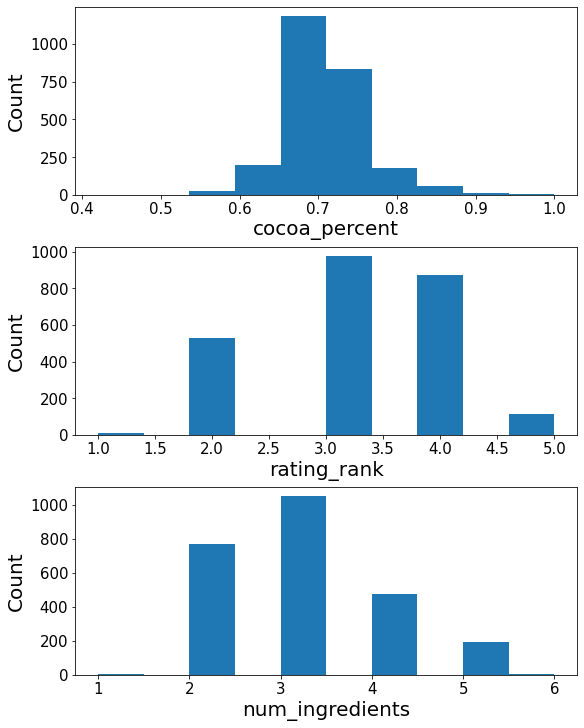

In [24]:
# Get histograms of the numerical data

# Create figure
fig, axes = plt.subplots(3, figsize = (8, 10), layout = 'constrained')

# Specify features interested in
num_features = ['cocoa_percent', 'rating_rank', 'num_ingredients']
x_axes = num_features
y_axes = ['Count', 'Count', 'Count']

# Create histograms
axes = np.ravel(axes)

for idx, ax in enumerate(axes):
    ax.hist(chocolate_cleaned[num_features[idx]].dropna(), bins = 10)
    ax.set_xlabel(x_axes[idx], fontsize = 20)
    ax.set_ylabel(y_axes[idx], fontsize = 20)
    ax.tick_params(axis = 'both', labelsize = 15)
    
plt.show()

Ratings are heavily left skewed. Cocoa percent and number of ingredients appear to be normally distributed.

In [25]:
def ratings_colors(ratings):
    '''
    Color Code Ratings for bar chart
    
    args:
        ratings (list)
        
    returns:
        colors (dict)
    '''
    colors = {}
    
    for rating in ratings:
        if rating == 1:
            colors["Unpleasant"] = "#ff4545"
        elif rating == 2:
            colors["Disappointing"] = "#ffa534"
        elif rating == 3:
            colors["Recommended"] = "#ffe234"
        elif rating == 4:
            colors["Highly Recommended"] = "#b7dd29"
        else:
            colors["Outstanding"] = "#57e32c"
            
    return colors

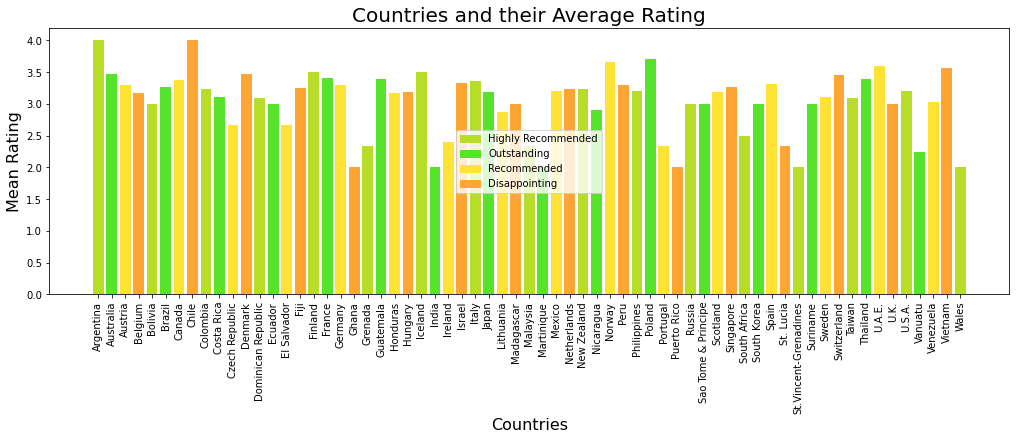

In [26]:
# Locations represented and mean rating
by_location = chocolate_cleaned.groupby('location')['rating_rank'].mean()

# Split of the parks and the counts
locations = list(by_location.keys())
means = list(by_location.values)

# Create figure
fig, ax = plt.subplots(1, 1, figsize = (14, 6), layout = 'constrained')

# Color barchart based on ratings
colors = ratings_colors(means)

# Create barchart
ax.bar(locations, means, width = 0.8, color = colors.values())

# Customize labels
ax.set_xticks(locations)
ax.set_xticklabels(locations, rotation = 90)
ax.set_title("Countries and their Average Rating", fontsize = 20)
ax.set_xlabel("Countries", fontsize = 16)
ax.set_ylabel("Mean Rating", fontsize = 16)
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels, loc = "center")

Text(0, 0.5, 'Mean Rating')

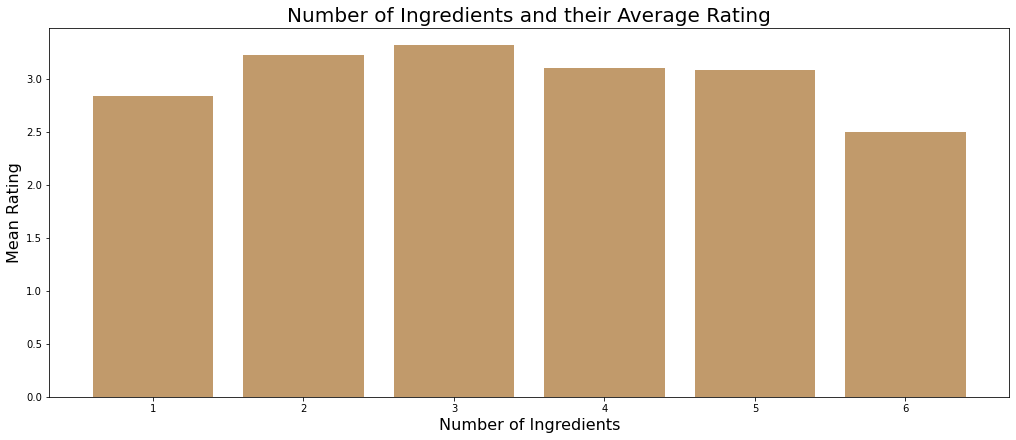

In [27]:
# Ingredients represented and mean rating
by_ingredients = chocolate_cleaned.groupby('num_ingredients')['rating_rank'].mean()

# Split of the parks and the counts
ingredients = list(by_ingredients.keys())
means = list(by_ingredients.values)

# Create figure
fig, ax = plt.subplots(1, 1, figsize = (14, 6), layout = 'constrained')

# Create barchart
ax.bar(ingredients, means, width = 0.8, color = "#C19A6B")

# Customize labels
ax.set_title("Number of Ingredients and their Average Rating", fontsize = 20)
ax.set_xlabel("Number of Ingredients", fontsize = 16)
ax.set_ylabel("Mean Rating", fontsize = 16)

Text(0, 0.5, 'Mean Rating')

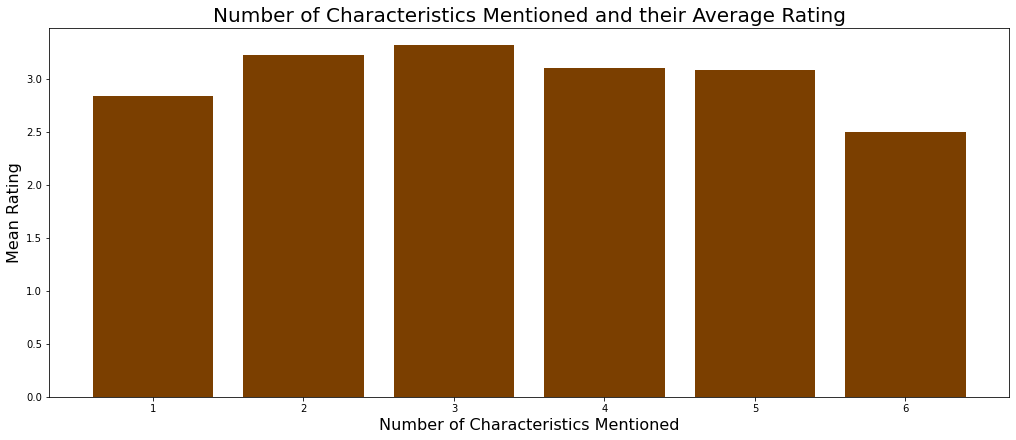

In [28]:
# Characteristics represented and mean rating
by_characteristics = chocolate_cleaned.groupby('num_ingredients')['rating_rank'].mean()

# Split of the parks and the counts
characteristics = list(by_characteristics.keys())
means = list(by_characteristics.values)

# Create figure
fig, ax = plt.subplots(1, 1, figsize = (14, 6), layout = 'constrained')

# Create barchart
ax.bar(characteristics, means, width = 0.8, color = "#7B3F00")

# Customize labels
ax.set_title("Number of Characteristics Mentioned and their Average Rating", fontsize = 20)
ax.set_xlabel("Number of Characteristics Mentioned", fontsize = 16)
ax.set_ylabel("Mean Rating", fontsize = 16)

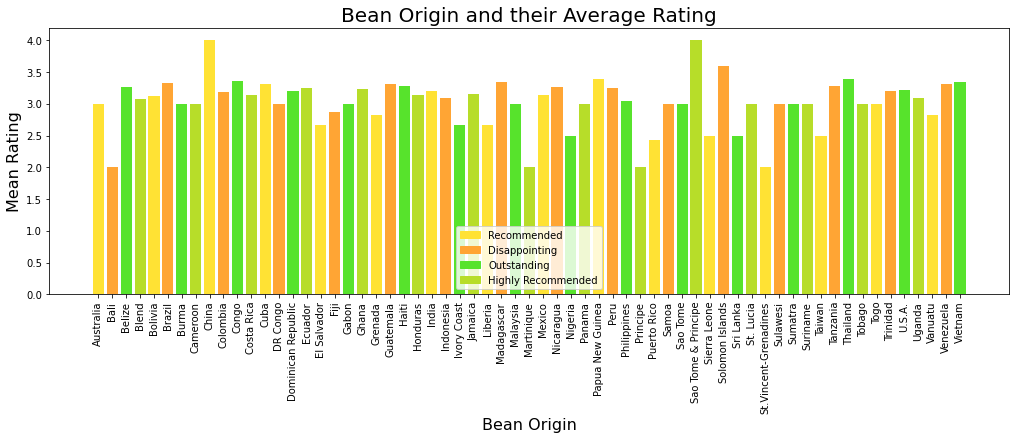

In [39]:
# Bean Origin and mean rating
by_origin = chocolate_cleaned.groupby('bean_origin')['rating_rank'].mean()

# Split of the parks and the counts
origin = list(by_origin.keys())
means = list(by_origin.values)

# Create figure
fig, ax = plt.subplots(1, 1, figsize = (14, 6), layout = 'constrained')

# Color barchart based on ratings
colors = ratings_colors(means)

# Create barchart
ax.bar(origin, means, width = 0.8, color = colors.values())

# Customize labels
ax.set_xticks(origin)
ax.set_xticklabels(origin, rotation = 90)
ax.set_title("Bean Origin and their Average Rating", fontsize = 20)
ax.set_xlabel("Bean Origin", fontsize = 16)
ax.set_ylabel("Mean Rating", fontsize = 16)

# Cusromize Legend
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color = colors[label]) for label in labels]
plt.legend(handles, labels, loc = "lower center")

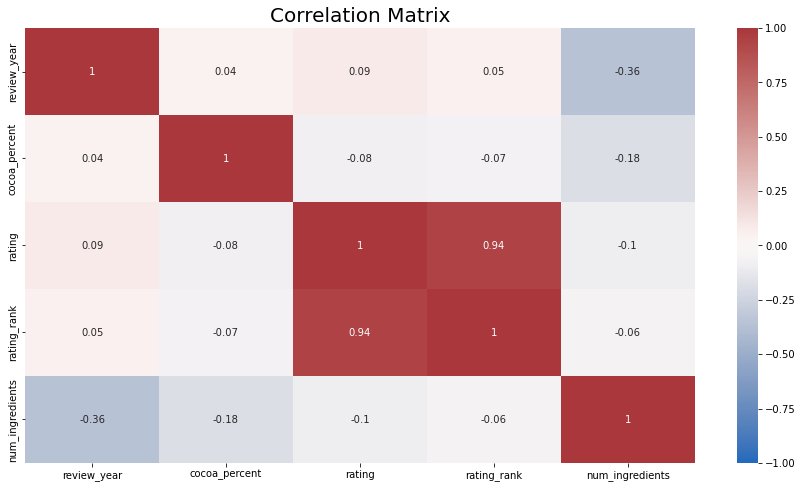

In [23]:
# Correlations
pearson_corr = chocolate_cleaned.corr(method = 'pearson').round(2)

# create figure
plt.figure(figsize = (15, 8))

# Customize title
plt.title("Correlation Matrix", fontsize = 20)

# Create heatmap of correlations
sns.heatmap(pearson_corr, annot = True, vmax = 1, vmin = -1, center = 0, cmap = 'vlag')

# display chart
plt.show()

It does not appear to be any highly correlated features.